In [75]:
import pickle
import math
import random

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from joblib import Parallel, delayed
from sklearn.manifold import TSNE
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler

In [92]:
web_graph = pickle.load(open('graph_directed_weighted_v5.pkl', 'rb'))
final_embeddings = pickle.load(open('embeddings_test_domain_graph_directed_v5.pkl', 'rb'))
sim_matrix = pickle.load(open('cosine_matrix_test_domain_graph_directed_v5.pkl', 'rb'))
domain_inv_map = pickle.load(open('domain_inv_map_directed_v5.pkl', 'rb'))

<IPython.core.display.Javascript object>


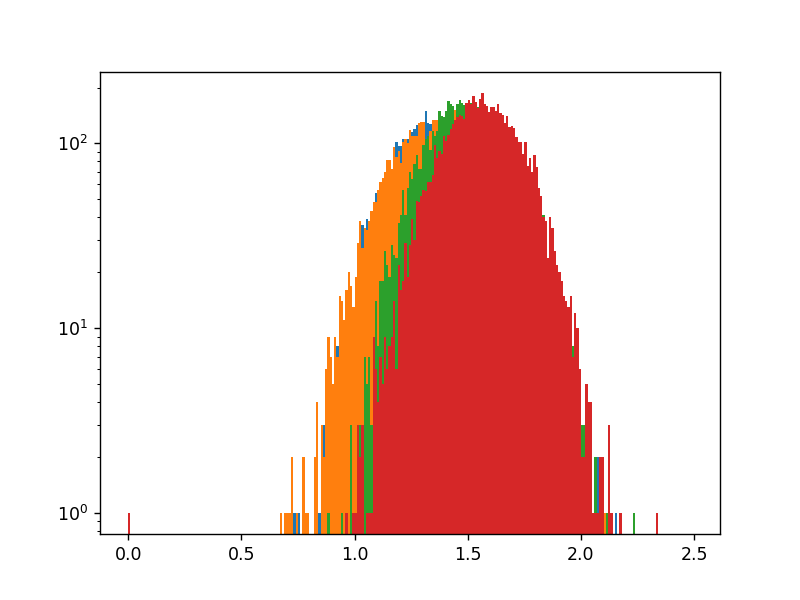

In [96]:
#plt.figure(figsize=(10, 4))
plt.hist(sim_matrix[110], bins=[i/100 for i in range(250)], log=True)
plt.hist(sim_matrix[1], bins=[i/100 for i in range(250)], log=True)
plt.hist(sim_matrix[100], bins=[i/100 for i in range(250)], log=True)
plt.hist(sim_matrix[470], bins=[i/100 for i in range(250)], log=True)

plt.show()

In [52]:
#Similarity is based  on the batch inputs not on the batch labels!
#This is important
#batch_inputs

In [97]:
results = []
for idx_row, row in enumerate(sim_matrix):
    #print (row)
    top_n_scores = [row[i] for i in np.argsort(row)[:2]]
    top_n_nodes = [i for i in np.argsort(row)[:2]]
    results.append([top_n_scores[1], top_n_nodes[1]])

In [98]:
results = np.array(results)

In [99]:
len(results)

7141

In [100]:
np.argsort(results[:,0])[:100]

array([3176, 3179,  939, 3708, 1585, 3720, 4108, 5577, 5509, 3775, 4703,
       6459,  746, 5989, 3057, 3942, 6637, 5993, 6806, 6370, 6051, 2344,
       2355, 6147,  234, 6162, 1577, 6773, 3891, 4436, 5835, 1029, 5731,
       1814, 5823, 5033, 3173, 4149, 5713, 6349,   82,  259, 2130, 1665,
       1546, 5342, 4596, 3876, 3603,  698, 6450, 7113, 5369, 4727, 2319,
       6340, 5911, 6111, 4047, 4130, 4749,   60,  337, 5302, 3406, 3374,
        325, 2911, 4183, 3615, 6882, 5567, 5769, 3217,  358, 5548, 4275,
       4096, 5458,   43, 1693, 4367, 1789, 2782, 2370, 3626, 6889, 4685,
       1298,  890, 4053, 1613, 5501,  178, 3029,  150, 5009, 5881,  751,
       2275], dtype=int64)

In [101]:
list_results = []

for node in range(len(results)):
    #print (node)
    sim = sim_matrix[node]

    top_n_scores = [sim[i] for i in np.argsort(sim)[:4]]
    top_n_nodes = [i for i in np.argsort(sim)[:4]]

    bottom_n_scores = [sim[i] for i in np.argsort(sim)[-4:]]
    bottom_n_nodes = [i for i in np.argsort(sim)[-4:]]
    
    top_nodes = [domain_inv_map[i] for i in top_n_nodes]
    bottom_nodes = [domain_inv_map[i] for i in bottom_n_nodes]
    
    df = pd.DataFrame([np.concatenate([top_nodes, top_n_scores, bottom_nodes, bottom_n_scores], axis=0)],
            columns=['top_0', 'top_1', 'top_2', 'top_3', 
                     'top_score_0', 'top_score_1', 'top_score_2', 'top_score_3',
                     'bottom_0', 'bottom_1', 'bottom_2', 'bottom_3', 
                     'bottom_score_0', 'bottom_score_1', 'bottom_score_2', 'bottom_score_3'])
    
    list_results.append(df)

In [102]:
df_all = pd.concat(list_results)

In [104]:
df_all.sort_values(by=['top_1', 'top_2', 'top_3'], inplace=True)

In [106]:
df_all.to_csv('directed_graph_results_v5.csv', index=False)

In [61]:
k_means = MiniBatchKMeans(n_clusters=100)

In [62]:
k_means_clusters = k_means.fit_predict(final_embeddings)
k_means_coordinates = k_means.fit_transform(final_embeddings)

In [63]:
np.unique(k_means_clusters, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([ 48, 108,  65,  72,  87,  69,  14,  39,  44,   1,   9, 107,  76,
         45,  13,  63,  34,  33,  43,  73,  71,  41,  60,  66,  85,   2,
         62,  57,  35,  39,  51,  60,  62,  73,  88,  43,  67,  30,  52,
         44,  30,  61,  42,  99,  70,  23,  47,  62,  85,  98,  49,  19,
         34,   2,  50,   1,  48,  58,  54,  37,  13,  65,  46,  10,  44,
         30,   8,  11,  80,  24,  33,  28,   8,  14,   5,  61,  47,  34,
         62,  26,  66,   3,  27,  32,   4,  48,  51,  12, 134,  24,  53,
         25,  28,  39,  10,  43,  57,  

In [64]:
df_clusters = pd.DataFrame(list(zip(*[np.array([domain_inv_map[i] for i in range(len(k_means_clusters))]), 
                                      k_means_clusters])), columns=['domain', 'cluster'])

In [65]:
df_clusters[df_clusters['cluster']==2].head(10)

,domain,cluster
83,creativity-online,2
89,globalwarming,2
188,chime,2
370,hover,2
380,powster,2
389,successfactors,2
553,defense,2
563,uscg,2
573,webopedia,2
584,pugetsoundnavymuseum,2


In [ ]:
learning_grid = [10, 20]
perplexity_grid = [15, 20, 25]
metric_grid = ['l2', 'l1', 'euclidean', 'kulsinski', 'wminkowski', 'chebyshev', 'mahalanobis',
  'sokalmichener', 'rogerstanimoto', 'infinity', 'p', 'canberra',
  'haversine', 'sokalsneath', 'minkowski', 'pyfunc', 
  'cityblock', 'braycurtis', 'manhattan']

for learning_rate in learning_grid:
    for perplexity in perplexity_grid:
        for metric in metric_grid: 
            print (learning_rate, perplexity, metric)
            try:
                tsne = TSNE(perplexity=perplexity, n_components=2, learning_rate=learning_rate, n_iter=20000, 
                        verbose=9, metric=metric)

            #low_dim_embs = tsne.fit_transform(sim_matrix)
                low_dim_embs = tsne.fit_transform(final_embeddings)

                pickle.dump(low_dim_embs, \
open('dimensional_reduction/low_dim_embs_directed_domain_only_grid_%d_%d_%s_v5.pkl' % (learning_rate, perplexity, metric), 'wb'))
            except:
                continue

10 15 l2
[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 7141 samples in 0.017s...


In [53]:
#pickle.dump(low_dim_embs, open('low_dim_embs_25_50.pkl', 'wb'))

In [54]:
#low_dim_embs = pickle.load(open('low_dim_embs_25_50.pkl', 'rb'))

In [55]:
low_dim_embs

array([[ -3.37238760e-07,   1.56495290e-07],
       [ -1.48607796e-06,  -3.33824346e-08],
       [ -3.32561740e-07,  -4.24519584e-07],
       ..., 
       [ -2.56994383e-07,  -2.52471835e-07],
       [ -1.88423954e-07,   1.47369065e-07],
       [ -2.20967991e-07,   1.25523041e-08]], dtype=float32)

In [18]:
%matplotlib notebook
import mpld3
from mpld3 import plugins
mpld3.enable_notebook()

In [85]:
labels

['www.blazingcatfur.ca',
 'www.theatlanticcities.com',
 'www.personalberaterseitenblicke.at',
 'wiki.openrightsgroup.org',
 'tv.verizon.com',
 'de.stars.yahoo.com',
 'investor.activision.com',
 'www.publimetro.com.mx',
 'manage.bookabach.co.nz',
 'quillette.com',
 'sell.amazon.com',
 'lpgawomensnetwork.com',
 'web.archive.org',
 'www.deadline.com',
 'rebeccabradleycrime.com',
 'unityworks.us',
 'nightmarebeforechloe.tumblr.com',
 'funnyordie.tumblr.com',
 'ir.theice.com',
 'jtsalikis.blogspot.de',
 'olympiabookfair.com',
 'www.relevantmagazine.com',
 'kidseatshadows.tumblr.com',
 'www.girlsgolf.org',
 'danieljpowell-blog-blog.tumblr.com',
 'onlinelibrary.wiley.com',
 'orders.purch.com',
 'yho.com',
 'www.kevinmd.com',
 'ja.wikipedia.org',
 'br.ajuda.yahoo.com',
 '2007.weblogawards.org',
 'www.morningstar.com.au',
 'www.textmarketer.co.uk',
 'www.scientificamerican.com',
 'www.thememriblog.org',
 'www.mmaglobal.com',
 'www.dadcdigital.com',
 'jorobinho.tumblr.com',
 'advertising.weather

In [19]:
labels = [domain_inv_map[i] for i in range(len(domain_inv_map))]

#pickle.dump(low_dim_embs, open('low_dim_embs.pkl', 'wb'))

#low_dim_embs = pickle.load(open('low_dim_embs_grid_1_5.pkl', 'rb'))

In [20]:
import matplotlib
import matplotlib.cm as cm

20 15 kulsinski


<IPython.core.display.Javascript object>


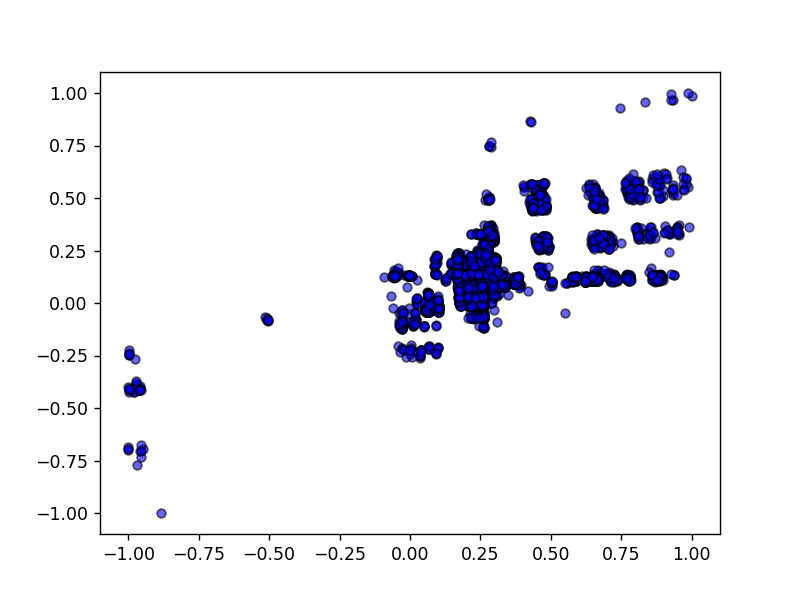

In [81]:
learning_grid = [20]
perplexity_grid = [15]
metric_grid = ['kulsinski']
#learning_grid = [5, 10, 20]
#perplexity_grid = [15, 20, 25]
#metric_grid = ['cosine', 'l2', 'l1', 'euclidean', 'kulsinski', 'wminkowski', 'chebyshev', 'mahalanobis',
#  'sokalmichener', 'rogerstanimoto', 'infinity', 'p', 'canberra',
#  'haversine', 'sokalsneath', 'minkowski', 'pyfunc', 
#  'cityblock', 'braycurtis', 'manhattan']

for learning_rate in learning_grid:
    for perplexity in perplexity_grid:
        for metric in metric_grid:
            print (learning_rate, perplexity, metric)
            try:
                low_dim_embs = \
                pickle.load(open('embeddings/low_dim_embs_directed_domain_only_grid_%d_%d_%s.pkl' % (learning_rate, perplexity, metric), 'rb'))
                scaler = MinMaxScaler(feature_range=[-1, 1])

                low_dim_embs = scaler.fit_transform(low_dim_embs)
                fig, ax = plt.subplots()

                points = ax.plot(low_dim_embs[:,0], low_dim_embs[:,1], 'o', color='b',
                             mec='k', ms=5, mew=1, alpha=.6)
                fig.savefig('low_dim_embs_directed_domain_only_grid_%d_%d_%s.png' % (learning_rate, perplexity, metric))
            except:
                continue
tooltip = plugins.PointHTMLTooltip(points[0], labels)

plugins.connect(fig, tooltip)

In [82]:
mpld3.display()